In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


SELECTED ANNUAL INCOME AND SPENDING SCORE

In [4]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

NUMBER OF CLUSTERS USING ELBOW METHOD

In [5]:
inertia=[]

In [8]:
for n in range(1,11):
  kmeans=KMeans(n_clusters=n,random_state=0)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

PLOT THE ELBOW CURVE

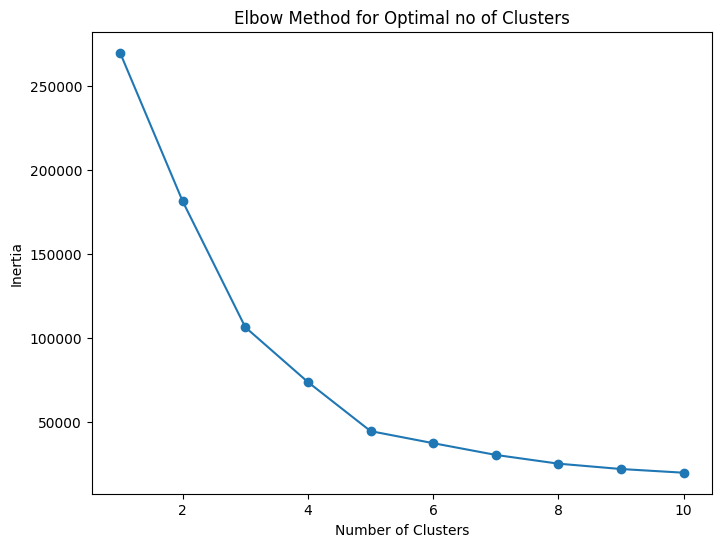

In [9]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for Optimal no of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

FIT THE K-MEANS ALGORITHM WITH THE NO OF CLUSTERS

In [10]:
optimal_clusters=5
kmeans=KMeans(n_clusters=optimal_clusters,random_state=0)
clusters=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ADD THE CLUSTER TO THE ORIGINAL DATAFRAME

In [11]:
df['Clusters']=clusters

PLOT THE CLUSTERS

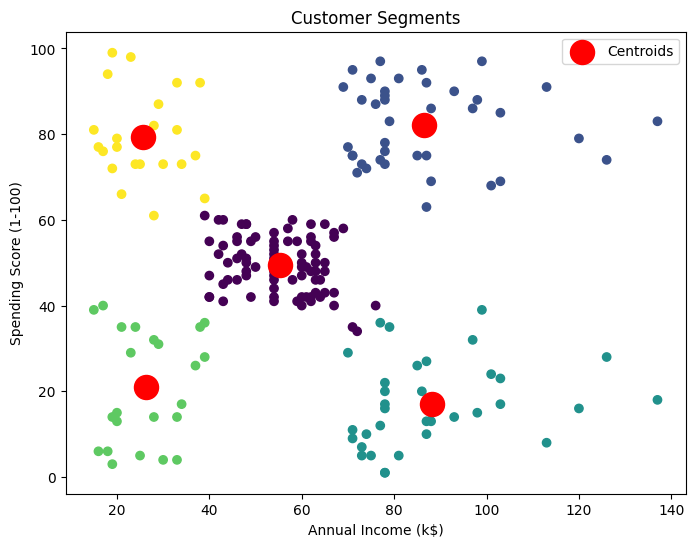

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=clusters,cmap='viridis',marker='o')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()